In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
import timeit

<ipython-input-1-71f514bda330>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def get_stock_data(normalized=0):
    url = "EDELWEISSNS.csv"
    col_names = ['Date','Open','High','Low','Close','Volume','Adj']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [3]:
df = get_stock_data(0)
df.head()

<ipython-input-2-d5396d546540>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Year'], df['Month'], df['Day'] = date_split


,Date,Open,High,Low,Close,Volume,Adj,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,2008,10,10


In [4]:
df.drop(df.columns[[0,6,7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume
0,41.299999,41.685001,39.400002,40.525002,0.002930
1,39.700001,40.799999,37.200001,39.564999,0.002860
2,40.000000,40.599998,36.000000,36.119999,0.002611
3,35.000000,44.400002,34.500000,40.880001,0.002955
4,40.400002,40.400002,35.299999,37.910000,0.002741


In [5]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Low'] = df['Low']/100
df['Close'] = df['Close']/100
df['Volume'] = df['Volume']*100

print(df)

       Open     High     Low    Close    Volume
0     0.413  0.41685  0.3940  0.40525  0.292964
1     0.397  0.40800  0.3720  0.39565  0.286023
2     0.400  0.40600  0.3600  0.36120  0.261119
3     0.350  0.44400  0.3450  0.40880  0.295530
4     0.404  0.40400  0.3530  0.37910  0.274059
...     ...      ...     ...      ...       ...
2462  2.180  2.21000  2.0850  2.18550  2.185500
2463  2.215  2.21500  2.1010  2.12150  2.121500
2464  2.132  2.14450  1.8520  1.89400  1.894000
2465  1.914  1.98850  1.8100  1.89500  1.895000
2466  1.890  1.90900  1.6905  1.87000  1.870000

[2467 rows x 5 columns]


In [6]:
nan_value_index = []
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Low = df.Low.isnull()
for i in range(0, len(Low)):
    if Low[i] == 1:
        nan_value_index.append(i)
        df['Low'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0

In [7]:
X = df[['Open','High','Low', 'Volume']]
Y = df[['Close']]

In [8]:
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [9]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 4)
y_train (1973, 1)
X_test (494, 4)
y_test (494, 1)


# Training Using TensorFLOW

In [10]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [11]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate =0.0001),
              loss='mean_squared_error',metrics=[])

In [12]:
start = timeit.default_timer()
r = model.fit(X_train, Y_train, epochs = 2000)
stop = timeit.default_timer()
print('Time: ', stop - start)  

Epoch 1/2000
62/62 [==============================] - 1s 1ms/step - loss: 0.1483
Epoch 2/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0641
Epoch 3/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 4/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 5/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 6/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 7/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 8/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 9/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 10/2000
62/62 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 11/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12/2000
62/62 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 13/2000
62/62 [====

Epoch 97/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.5395e-05
Epoch 98/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.4632e-05
Epoch 99/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.4252e-05
Epoch 100/2000
62/62 [==============================] - 0s 1ms/step - loss: 5.5072e-05
Epoch 101/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.4147e-05
Epoch 102/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.3828e-05
Epoch 103/2000
62/62 [==============================] - 0s 2ms/step - loss: 5.3315e-05
Epoch 104/2000
62/62 [==============================] - 0s 1ms/step - loss: 5.3479e-05
Epoch 105/2000
62/62 [==============================] - 0s 1ms/step - loss: 5.3361e-05
Epoch 106/2000
62/62 [==============================] - 0s 1ms/step - loss: 5.3392e-05
Epoch 107/2000
62/62 [==============================] - 0s 1ms/step - loss: 5.3197e-05
Epoch 108/2000
62/62 [========================

62/62 [==============================] - 0s 2ms/step - loss: 4.2055e-05
Epoch 192/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.2630e-05
Epoch 193/2000
62/62 [==============================] - 0s 1ms/step - loss: 4.0829e-05
Epoch 194/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.2669e-05
Epoch 195/2000
62/62 [==============================] - 0s 1ms/step - loss: 4.2248e-05
Epoch 196/2000
62/62 [==============================] - 0s 1ms/step - loss: 4.2704e-05
Epoch 197/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.3055e-05
Epoch 198/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.2285e-05
Epoch 199/2000
62/62 [==============================] - 0s 1ms/step - loss: 4.1270e-05
Epoch 200/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.0821e-05
Epoch 201/2000
62/62 [==============================] - 0s 2ms/step - loss: 4.0869e-05
Epoch 202/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 1ms/step - loss: 3.7587e-05
Epoch 286/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6583e-05
Epoch 287/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6030e-05
Epoch 288/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5692e-05
Epoch 289/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6586e-05
Epoch 290/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5875e-05
Epoch 291/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5843e-05
Epoch 292/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.6768e-05
Epoch 293/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.6142e-05
Epoch 294/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.7736e-05
Epoch 295/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.6476e-05
Epoch 296/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 2ms/step - loss: 3.4924e-05
Epoch 380/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6926e-05
Epoch 381/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5218e-05
Epoch 382/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4866e-05
Epoch 383/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.7322e-05
Epoch 384/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5425e-05
Epoch 385/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5136e-05
Epoch 386/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5341e-05
Epoch 387/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6514e-05
Epoch 388/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.7584e-05
Epoch 389/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6360e-05
Epoch 390/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 1ms/step - loss: 3.5888e-05
Epoch 474/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4761e-05
Epoch 475/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5002e-05
Epoch 476/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4945e-05
Epoch 477/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5444e-05
Epoch 478/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6205e-05
Epoch 479/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4575e-05
Epoch 480/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4163e-05
Epoch 481/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5335e-05
Epoch 482/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5547e-05
Epoch 483/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4533e-05
Epoch 484/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 1ms/step - loss: 3.4593e-05
Epoch 568/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6303e-05
Epoch 569/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5542e-05
Epoch 570/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4267e-05
Epoch 571/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4468e-05
Epoch 572/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5630e-05
Epoch 573/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5015e-05
Epoch 574/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4558e-05
Epoch 575/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4938e-05
Epoch 576/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5476e-05
Epoch 577/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5013e-05
Epoch 578/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 1ms/step - loss: 3.4146e-05
Epoch 662/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4553e-05
Epoch 663/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4896e-05
Epoch 664/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6007e-05
Epoch 665/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5142e-05
Epoch 666/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5061e-05
Epoch 667/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3706e-05
Epoch 668/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4871e-05
Epoch 669/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4329e-05
Epoch 670/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4524e-05
Epoch 671/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5847e-05
Epoch 672/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 1ms/step - loss: 3.4103e-05
Epoch 756/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6091e-05
Epoch 757/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.6027e-05
Epoch 758/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5207e-05
Epoch 759/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5092e-05
Epoch 760/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4732e-05
Epoch 761/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4556e-05
Epoch 762/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4087e-05
Epoch 763/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4327e-05
Epoch 764/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4225e-05
Epoch 765/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4476e-05
Epoch 766/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 2ms/step - loss: 3.3467e-05
Epoch 850/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3808e-05
Epoch 851/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5016e-05
Epoch 852/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5123e-05
Epoch 853/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3613e-05
Epoch 854/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3915e-05
Epoch 855/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3641e-05
Epoch 856/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4818e-05
Epoch 857/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5152e-05
Epoch 858/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4728e-05
Epoch 859/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4265e-05
Epoch 860/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 2ms/step - loss: 3.4350e-05
Epoch 944/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5747e-05
Epoch 945/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4182e-05
Epoch 946/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4610e-05
Epoch 947/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4016e-05
Epoch 948/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4665e-05
Epoch 949/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4561e-05
Epoch 950/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.5980e-05
Epoch 951/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4598e-05
Epoch 952/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4878e-05
Epoch 953/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3759e-05
Epoch 954/2000
62/62 [==============================] - 0s

62/62 [==============================] - 0s 2ms/step - loss: 3.4471e-05
Epoch 1037/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3971e-05
Epoch 1038/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4750e-05
Epoch 1039/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4093e-05
Epoch 1040/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4262e-05
Epoch 1041/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4070e-05
Epoch 1042/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4183e-05
Epoch 1043/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5063e-05
Epoch 1044/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3643e-05
Epoch 1045/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3707e-05
Epoch 1046/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4605e-05
Epoch 1047/2000
62/62 [=========================

62/62 [==============================] - 0s 1ms/step - loss: 3.4974e-05
Epoch 1130/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4097e-05
Epoch 1131/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3298e-05
Epoch 1132/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3975e-05
Epoch 1133/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3727e-05
Epoch 1134/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4598e-05
Epoch 1135/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3849e-05
Epoch 1136/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3938e-05
Epoch 1137/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3939e-05
Epoch 1138/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3371e-05
Epoch 1139/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3595e-05
Epoch 1140/2000
62/62 [=========================

62/62 [==============================] - 0s 1ms/step - loss: 3.4863e-05
Epoch 1223/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.6946e-05
Epoch 1224/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3404e-05
Epoch 1225/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3238e-05
Epoch 1226/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3600e-05
Epoch 1227/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4085e-05
Epoch 1228/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4168e-05
Epoch 1229/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4959e-05
Epoch 1230/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4326e-05
Epoch 1231/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4854e-05
Epoch 1232/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4408e-05
Epoch 1233/2000
62/62 [=========================

62/62 [==============================] - 0s 1ms/step - loss: 3.3175e-05
Epoch 1316/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4627e-05
Epoch 1317/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3891e-05
Epoch 1318/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4638e-05
Epoch 1319/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4402e-05
Epoch 1320/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.4769e-05
Epoch 1321/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3794e-05
Epoch 1322/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4216e-05
Epoch 1323/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2890e-05
Epoch 1324/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4021e-05
Epoch 1325/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5250e-05
Epoch 1326/2000
62/62 [=========================

62/62 [==============================] - 0s 2ms/step - loss: 3.3061e-05
Epoch 1409/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3072e-05
Epoch 1410/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3776e-05
Epoch 1411/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2969e-05
Epoch 1412/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3100e-05
Epoch 1413/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3897e-05
Epoch 1414/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4504e-05
Epoch 1415/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2979e-05
Epoch 1416/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.5441e-05
Epoch 1417/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3368e-05
Epoch 1418/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3531e-05
Epoch 1419/2000
62/62 [=========================

62/62 [==============================] - 0s 2ms/step - loss: 3.2938e-05
Epoch 1502/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3196e-05
Epoch 1503/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3281e-05
Epoch 1504/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3176e-05
Epoch 1505/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.1764e-05
Epoch 1506/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2278e-05
Epoch 1507/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2235e-05
Epoch 1508/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3397e-05
Epoch 1509/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2095e-05
Epoch 1510/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2478e-05
Epoch 1511/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.3129e-05
Epoch 1512/2000
62/62 [=========================

62/62 [==============================] - 0s 2ms/step - loss: 3.3069e-05
Epoch 1595/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.1477e-05
Epoch 1596/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2568e-05
Epoch 1597/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2235e-05
Epoch 1598/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.1625e-05
Epoch 1599/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2496e-05
Epoch 1600/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.1884e-05
Epoch 1601/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.2978e-05
Epoch 1602/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.1833e-05
Epoch 1603/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1726e-05
Epoch 1604/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.1323e-05
Epoch 1605/2000
62/62 [=========================

62/62 [==============================] - 0s 1ms/step - loss: 3.2567e-05
Epoch 1688/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1262e-05
Epoch 1689/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2162e-05
Epoch 1690/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2050e-05
Epoch 1691/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1052e-05
Epoch 1692/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2454e-05
Epoch 1693/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1911e-05
Epoch 1694/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1486e-05
Epoch 1695/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2878e-05
Epoch 1696/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2159e-05
Epoch 1697/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2690e-05
Epoch 1698/2000
62/62 [=========================

62/62 [==============================] - 0s 1ms/step - loss: 3.1568e-05
Epoch 1781/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2535e-05
Epoch 1782/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1594e-05
Epoch 1783/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1231e-05
Epoch 1784/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1863e-05
Epoch 1785/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1322e-05
Epoch 1786/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1445e-05
Epoch 1787/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1916e-05
Epoch 1788/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2315e-05
Epoch 1789/2000
62/62 [==============================] - 0s 2ms/step - loss: 3.1666e-05
Epoch 1790/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1307e-05
Epoch 1791/2000
62/62 [=========================

62/62 [==============================] - 0s 1ms/step - loss: 3.2216e-05
Epoch 1874/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2278e-05
Epoch 1875/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.3221e-05
Epoch 1876/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1346e-05
Epoch 1877/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1360e-05
Epoch 1878/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2108e-05
Epoch 1879/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1206e-05
Epoch 1880/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1592e-05
Epoch 1881/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1658e-05
Epoch 1882/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1013e-05
Epoch 1883/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2225e-05
Epoch 1884/2000
62/62 [=========================

62/62 [==============================] - 0s 1ms/step - loss: 3.1626e-05
Epoch 1967/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1226e-05
Epoch 1968/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.2098e-05
Epoch 1969/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1275e-05
Epoch 1970/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1248e-05
Epoch 1971/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1255e-05
Epoch 1972/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.4775e-05
Epoch 1973/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1410e-05
Epoch 1974/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.0916e-05
Epoch 1975/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1580e-05
Epoch 1976/2000
62/62 [==============================] - 0s 1ms/step - loss: 3.1749e-05
Epoch 1977/2000
62/62 [=========================

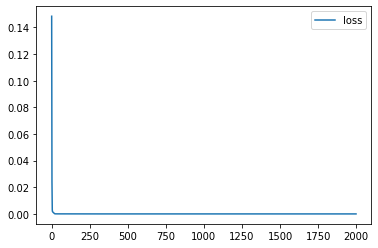

In [13]:
plt.plot(r.history['loss'],label = 'loss')
plt.legend()
plt.show()

In [14]:
predictions = model.predict(X_test)

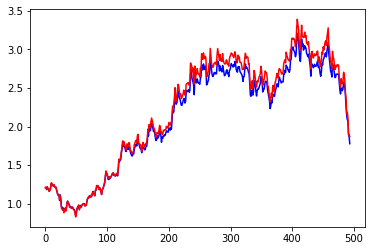

In [15]:
x_label = np.arange(0,predictions.shape[0],1)
plt.plot(x_label, predictions[:predictions.shape[0]], '-b', 
         x_label, Y_test[:predictions.shape[0]], '-r')
plt.show()

# Training Using Pytorch

In [16]:
import torch
import math

In [17]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 32),
    torch.nn.Linear(32, 10),
    torch.nn.Linear(10, 1),
)

In [18]:
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6

In [19]:
xx = torch.from_numpy(X_train.values)
yy = torch.from_numpy(Y_train.values)
print(xx.shape)
print(yy.shape)

torch.Size([1973, 4])
torch.Size([1973, 1])


In [20]:
xx = xx.to(torch.float32)
yy = yy.to(torch.float32)

In [21]:
start = timeit.default_timer()  
for t in range(20000):
    y_pred = model(xx)

    loss = loss_fn(y_pred, yy)
    if t % 100 == 99:
        print(t, loss.item())

    model.zero_grad()

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

stop = timeit.default_timer()
print('Time: ', stop - start)

99 65.80059814453125
199 53.201690673828125
299 49.551395416259766
399 46.52763366699219
499 43.69453430175781
599 41.01671600341797
699 38.48094177246094
799 36.076866149902344
899 33.79593276977539
999 31.630794525146484
1099 29.575286865234375
1199 27.624088287353516
1299 25.772579193115234
1399 24.0167236328125
1499 22.35289192199707
1599 20.77778434753418
1699 19.288368225097656
1799 17.88176727294922
1899 16.555238723754883
1999 15.306077003479004
2099 14.131646156311035
2199 13.029295921325684
2299 11.99637222290039
2399 11.030226707458496
2499 10.128158569335938
2599 9.287461280822754
2699 8.505400657653809
2799 7.779230117797852
2899 7.106203556060791
2999 6.483578205108643
3099 5.908629417419434
3199 5.378669261932373
3299 4.891041278839111
3399 4.443149089813232
3499 4.032461166381836
3599 3.6565208435058594
3699 3.312941074371338
3799 2.9994471073150635
3899 2.7138423919677734
3999 2.4540367126464844
4099 2.2180426120758057
4199 2.00398325920105
4299 1.810078740119934
4399 

In [22]:
x_test = torch.from_numpy(X_test.values)
y_test = torch.from_numpy(Y_test.values)
x_test = x_test.to(torch.float32)
y_test = y_test.to(torch.float32)
print(x_test.shape)
print(y_test.shape)

torch.Size([494, 4])
torch.Size([494, 1])


In [23]:
y_pred_test = model(x_test)

In [24]:
y_test = y_test.detach().numpy()
y_pred_test = y_pred_test.detach().numpy()

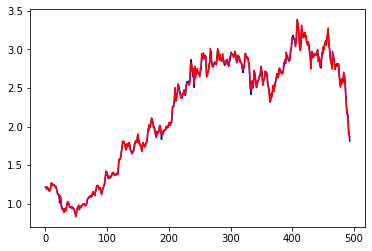

In [25]:
x_label = np.arange(0,y_pred_test.shape[0],1)
plt.plot(x_label, y_pred_test[:y_pred_test.shape[0]], '-b', 
         x_label, y_test[:y_pred_test.shape[0]], '-r')
plt.show()